In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

import EDA_functions as func

In [2]:
site = "G"

In [3]:
# load the data
# get parent directory
os.chdir("..")
data_directory = 'Data'

data_name = site + "_TurbineData.csv"
flag_name = site + "_FullPerformanceFlag.csv"

# read the data
data = pd.read_csv(os.path.join(os.getcwd(), data_directory, data_name))
flag = pd.read_csv(os.path.join(os.getcwd(), data_directory, flag_name))

# reset to current directory
fd = sys.path[0]
os.chdir(fd)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2951480 entries, 0 to 2951479
Data columns (total 27 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   Unnamed: 0                     int64  
 1   ts                             object 
 2   instanceID                     object 
 3   AoARel                         float64
 4   bladePitch                     float64
 5   bladePitchMax                  float64
 6   bladePitchMin                  float64
 7   bladePitchSetPoint             float64
 8   bladePitchStd                  float64
 9   cP                             float64
 10  generatorTorque                float64
 11  rotorTorque                    float64
 12  TI                             float64
 13  TSR                            float64
 14  Wind_speed                     float64
 15  Wind_direction                 float64
 16  Nacelle_position               float64
 17  Power                          float64
 18  Na

In [5]:
flag.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2951480 entries, 0 to 2951479
Data columns (total 4 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   Unnamed: 0  int64 
 1   ts          object
 2   instanceID  object
 3   value       int64 
dtypes: int64(2), object(2)
memory usage: 90.1+ MB


In [6]:
# print the number of turbines and the turbine IDs
turbine_count = data['instanceID'].nunique()
turbine_name = data['instanceID'].unique()
print(turbine_count)
print(turbine_name)

56
['G_WTGA01' 'G_WTGA02' 'G_WTGA03' 'G_WTGA04' 'G_WTGA05' 'G_WTGA06'
 'G_WTGA07' 'G_WTGA08' 'G_WTGA09' 'G_WTGA10' 'G_WTGA11' 'G_WTGA12'
 'G_WTGA13' 'G_WTGA14' 'G_WTGA15' 'G_WTGA16' 'G_WTGA17' 'G_WTGA18'
 'G_WTGA19' 'G_WTGA20' 'G_WTGA21' 'G_WTGA22' 'G_WTGA23' 'G_WTGA24'
 'G_WTGA25' 'G_WTGA26' 'G_WTGA27' 'G_WTGA28' 'G_WTGB01' 'G_WTGB02'
 'G_WTGB03' 'G_WTGB04' 'G_WTGB05' 'G_WTGB06' 'G_WTGB07' 'G_WTGB08'
 'G_WTGB09' 'G_WTGB10' 'G_WTGB11' 'G_WTGB12' 'G_WTGB13' 'G_WTGB14'
 'G_WTGB15' 'G_WTGB16' 'G_WTGB17' 'G_WTGB18' 'G_WTGB19' 'G_WTGB20'
 'G_WTGB21' 'G_WTGB22' 'G_WTGB23' 'G_WTGB24' 'G_WTGB25' 'G_WTGB26'
 'G_WTGB27' 'G_WTGB28']


In [7]:
# add the boolean flag signal to the data
data['value'] = flag['value']

# drop irrelevant columns
data = data.drop(columns = ['AoARel', 'bladePitch', 'bladePitchMax',
       'bladePitchMin', 'bladePitchSetPoint', 'bladePitchStd', 'cP',
       'generatorTorque', 'rotorTorque', 'TSR',
       'Wind_direction', 'Nacelle_position', 'Nacelle_temperature',
       'Rotor_speed', 'Power_Minimum', 'Power_Maximum', 'Generator_RPM', 'Generator_RPM_Max',
       'Generator_RPM_Min'])

In [8]:
# Add month, day, and hour
data['ts'] = pd.to_datetime(data['ts'], format = '%d-%b-%Y %H:%M:%S')
data['Month'] = data.ts.dt.month
data['Day'] = data.ts.dt.day
data['Hour'] = data.ts.dt.hour

In [9]:
data.columns.values

array(['Unnamed: 0', 'ts', 'instanceID', 'TI', 'Wind_speed', 'Power',
       'Ambient_temperature', 'Wind_speed_Standard_deviation', 'value',
       'Month', 'Day', 'Hour'], dtype=object)

In [10]:
# Rearrange columns
data = data.reindex(columns = ['ts',  'Month' , 'Day', 'Hour', 'instanceID', 'Wind_speed', 'Wind_speed_Standard_deviation', 
                               'TI', 'Ambient_temperature', 'Power', 'value'])

# rename columns 
data.columns = ['ts',  'Month', 'Day', 'Hour', 'instanceID', 'Wind_speed', 'Wind_speed_sd', 'TI', 
                'Temperature', 'Power', 'value']

In [11]:
data.sample(5, random_state = 10)

,ts,Month,Day,Hour,instanceID,Wind_speed,Wind_speed_sd,TI,Temperature,Power,value
2162953,2020-09-25 05:20:00,9,25,5,G_WTGA10,5.3,1.70,32.075471,7.0,58.000000,0
37602,2020-01-05 15:50:00,1,5,15,G_WTGA27,6.4,1.95,30.468750,9.0,109.800003,1
1235370,2020-06-02 04:40:00,6,2,4,G_WTGA11,1.6,0.00,0.000000,27.0,0.000000,0
834328,2020-04-13 11:00:00,4,13,11,G_WTGB13,13.4,1.55,11.567164,5.0,541.000000,1
1713078,2020-07-31 10:20:00,7,31,10,G_WTGB11,5.5,1.26,22.909091,21.0,39.799999,1


In [12]:
data.describe()

,Month,Day,Hour,Wind_speed,Wind_speed_sd,TI,Temperature,Power,value
count,2.951480e+06,2.951480e+06,2.951480e+06,2.930219e+06,2.929692e+06,2.927056e+06,2.929730e+06,2.930218e+06,2.951480e+06
mean,6.513557e+00,1.575655e+01,1.149978e+01,7.097975e+00,1.378928e+00,2.074169e+01,1.425632e+01,1.552928e+02,7.549690e-01
std,3.451285e+00,8.811682e+00,6.922303e+00,4.332207e+00,7.656044e-01,6.827372e+00,9.112413e+00,1.794272e+02,4.301056e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-9.900000e+01,-3.160000e+01,0.000000e+00
25%,4.000000e+00,8.000000e+00,5.000000e+00,4.000000e+00,8.400000e-01,1.680328e+01,8.000000e+00,1.400000e+01,1.000000e+00
50%,7.000000e+00,1.600000e+01,1.100000e+01,6.000000e+00,1.220000e+00,2.000000e+01,1.300000e+01,6.660000e+01,1.000000e+00
75%,1.000000e+01,2.300000e+01,1.700000e+01,9.400000e+00,1.790000e+00,2.380952e+01,1.800000e+01,2.615000e+02,1.000000e+00
max,1.200000e+01,3.100000e+01,2.300000e+01,3.450000e+01,1.381000e+01,3.937500e+02,1.770000e+02,3.276700e+03,1.000000e+00


### Plot time series

In [15]:
# select one turbine
data_01 = data[data['instanceID'] == site + '_WTGA01']

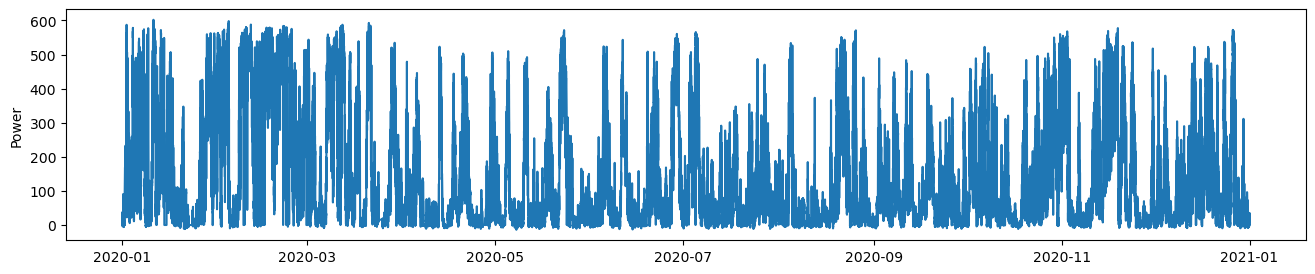

In [16]:
func.plot_timeseries(data_01, 'Power')

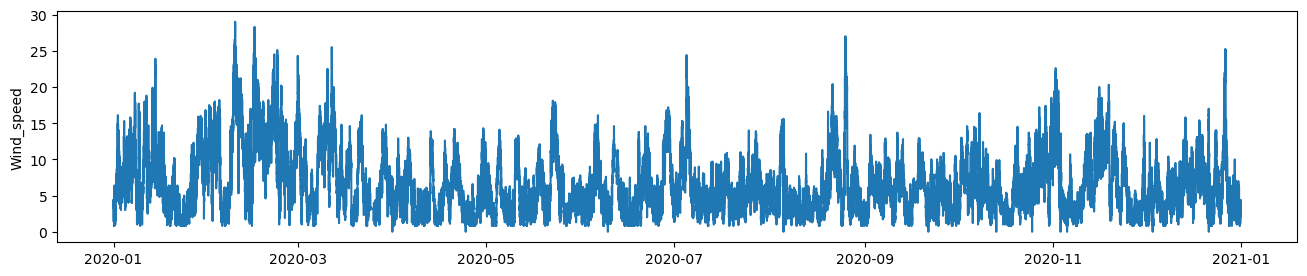

In [17]:
func.plot_timeseries(data_01, 'Wind_speed')

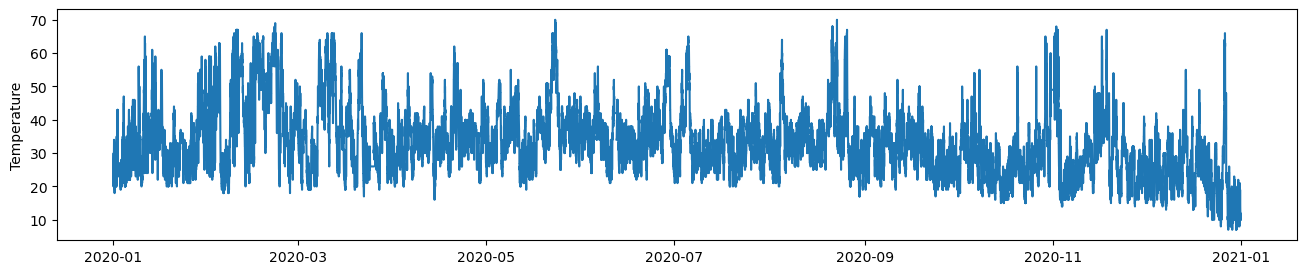

In [18]:
func.plot_timeseries(data_01, 'Temperature')

### Full performance data

In [19]:
# sort the turbine IDs and create a list of the IDs
instanceID = sorted(data.instanceID.unique().tolist())
ID = [instanceID[i][5:] for i in range (len(instanceID))] 

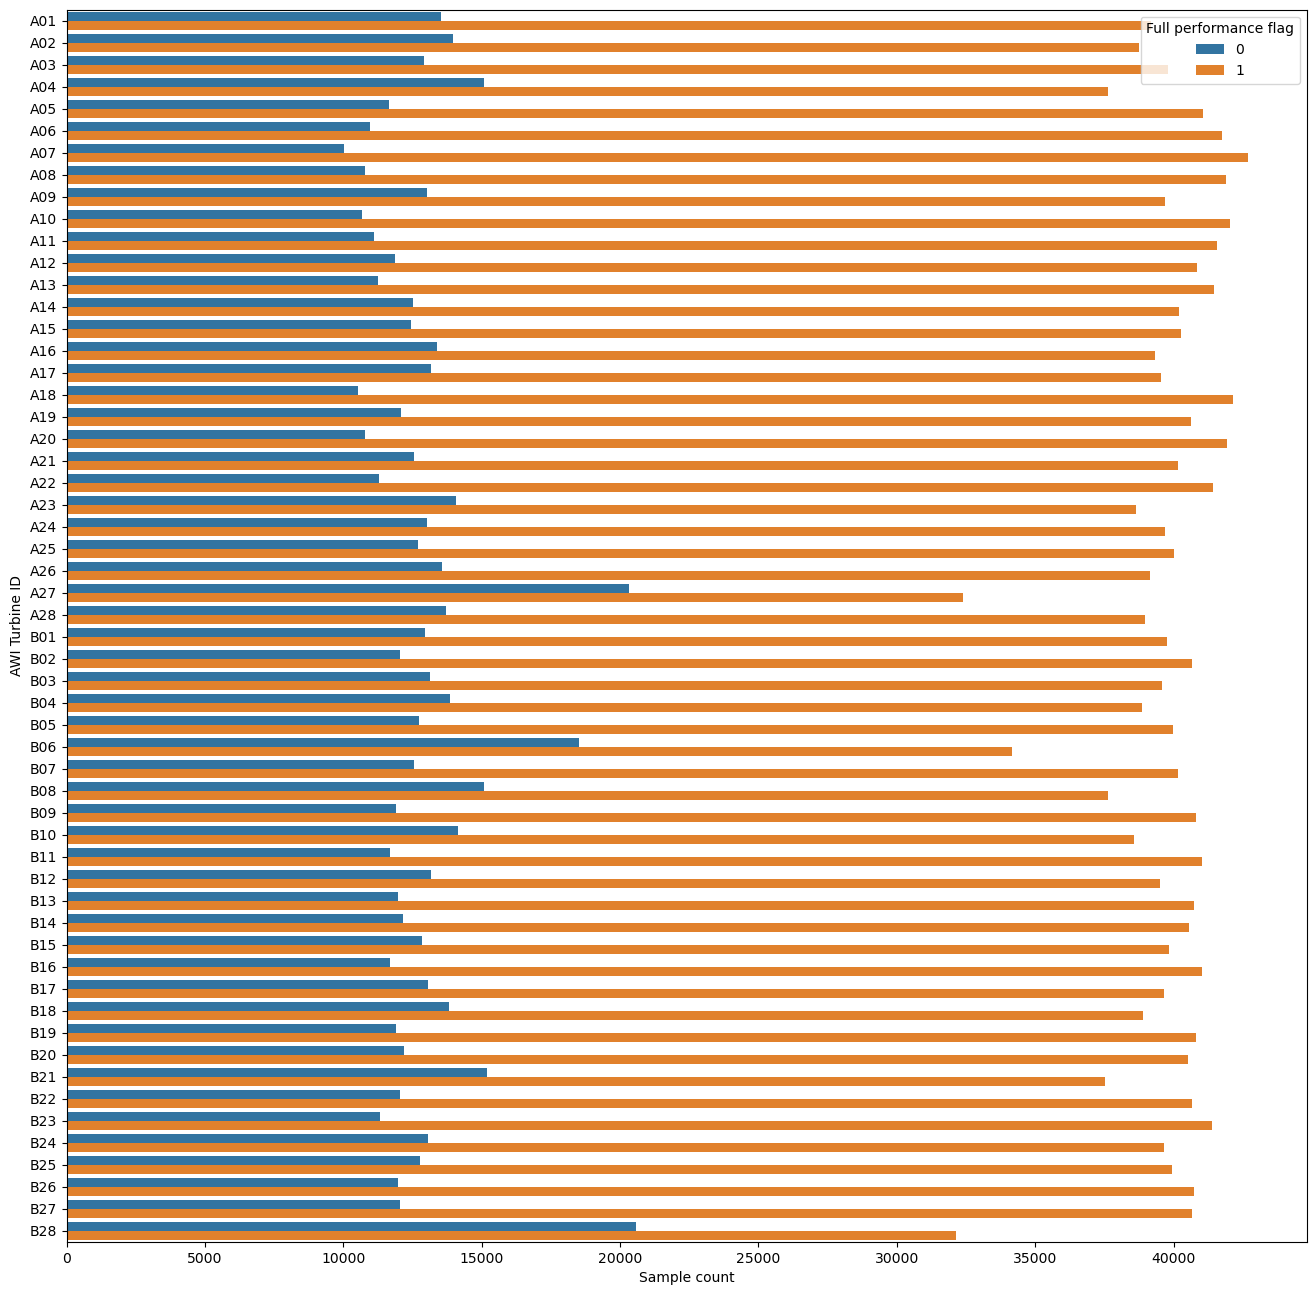

In [23]:
# Plot bar chart of full performance flag vs sample count for each turbine
bar = data.groupby(by=['instanceID','value']).count().reset_index()
func.plot_fullperformanceflag(df=bar, order=instanceID, ticklabels=ID, figsize = (16,16), orient = "h")

In [24]:
# only select rows with flag value = 1
data = data[data['value'] == 1]

# drop irrelevant columns 
data = data.drop(columns = ['value'])

In [25]:
data

,ts,Month,Day,Hour,instanceID,Wind_speed,Wind_speed_sd,TI,Temperature,Power
0,2020-01-01,1,1,0,G_WTGA01,4.4,0.84,19.090908,22.0,36.099998
1,2020-01-01,1,1,0,G_WTGA02,5.0,1.18,23.599999,6.0,51.000000
2,2020-01-01,1,1,0,G_WTGA03,5.0,0.55,11.000000,8.0,39.400002
3,2020-01-01,1,1,0,G_WTGA04,4.5,0.89,19.777777,3.0,40.700001
4,2020-01-01,1,1,0,G_WTGA05,5.0,1.14,22.800000,6.0,49.200001
...,...,...,...,...,...,...,...,...,...,...
2951473,2021-01-01,1,1,0,G_WTGB22,3.6,0.45,12.500000,2.0,8.400000
2951474,2021-01-01,1,1,0,G_WTGB23,3.0,0.77,25.666666,1.0,13.000000
2951475,2021-01-01,1,1,0,G_WTGB24,2.6,0.63,24.230770,1.0,6.200000
2951477,2021-01-01,1,1,0,G_WTGB26,3.0,0.77,25.666666,1.0,7.000000


In [26]:
# remove invalid values and null entries. 
# acceptable TI range: [0, 100]
# acceptable temperature range: [-5, 40]
data_clean = func.clean_data(data)
data_clean

,ts,Month,Day,Hour,instanceID,Wind_speed,Wind_speed_sd,TI,Temperature,Power
0,2020-01-01,1,1,0,G_WTGA01,4.4,0.84,19.090908,22.0,36.099998
1,2020-01-01,1,1,0,G_WTGA02,5.0,1.18,23.599999,6.0,51.000000
2,2020-01-01,1,1,0,G_WTGA03,5.0,0.55,11.000000,8.0,39.400002
3,2020-01-01,1,1,0,G_WTGA04,4.5,0.89,19.777777,3.0,40.700001
4,2020-01-01,1,1,0,G_WTGA05,5.0,1.14,22.800000,6.0,49.200001
...,...,...,...,...,...,...,...,...,...,...
2951473,2021-01-01,1,1,0,G_WTGB22,3.6,0.45,12.500000,2.0,8.400000
2951474,2021-01-01,1,1,0,G_WTGB23,3.0,0.77,25.666666,1.0,13.000000
2951475,2021-01-01,1,1,0,G_WTGB24,2.6,0.63,24.230770,1.0,6.200000
2951477,2021-01-01,1,1,0,G_WTGB26,3.0,0.77,25.666666,1.0,7.000000


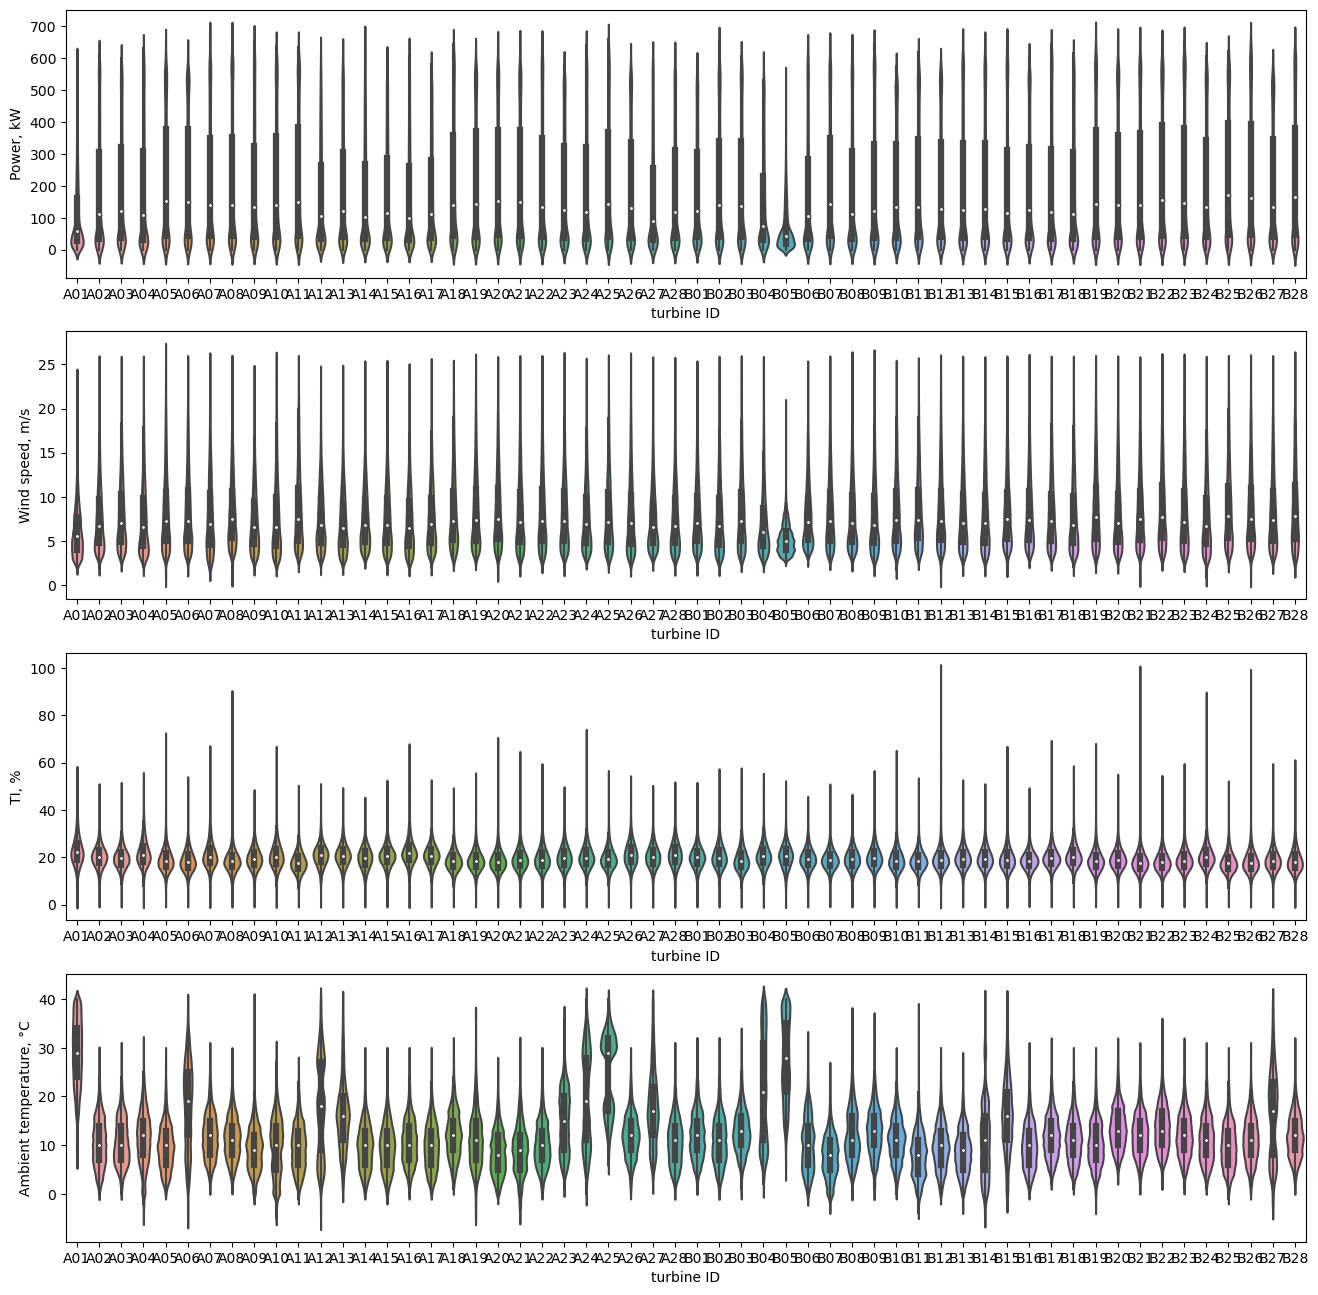

In [29]:
# Make violin plots of the variables 
var = [ 'Power','Wind_speed', 'TI','Temperature']
var_name = [ 'Power, kW','Wind speed, m/s', 'TI, %','Ambient temperature, °C']

func.plot_violinplot(df=data_clean, var=var, var_name=var_name, order=instanceID, 
                ticklabels=ID, figsize=(16, 16), orient = "v")

In [43]:
instanceID_01 = instanceID[0:25]
instanceID_02 = instanceID[25:50]
instanceID_03 = instanceID[50:56]

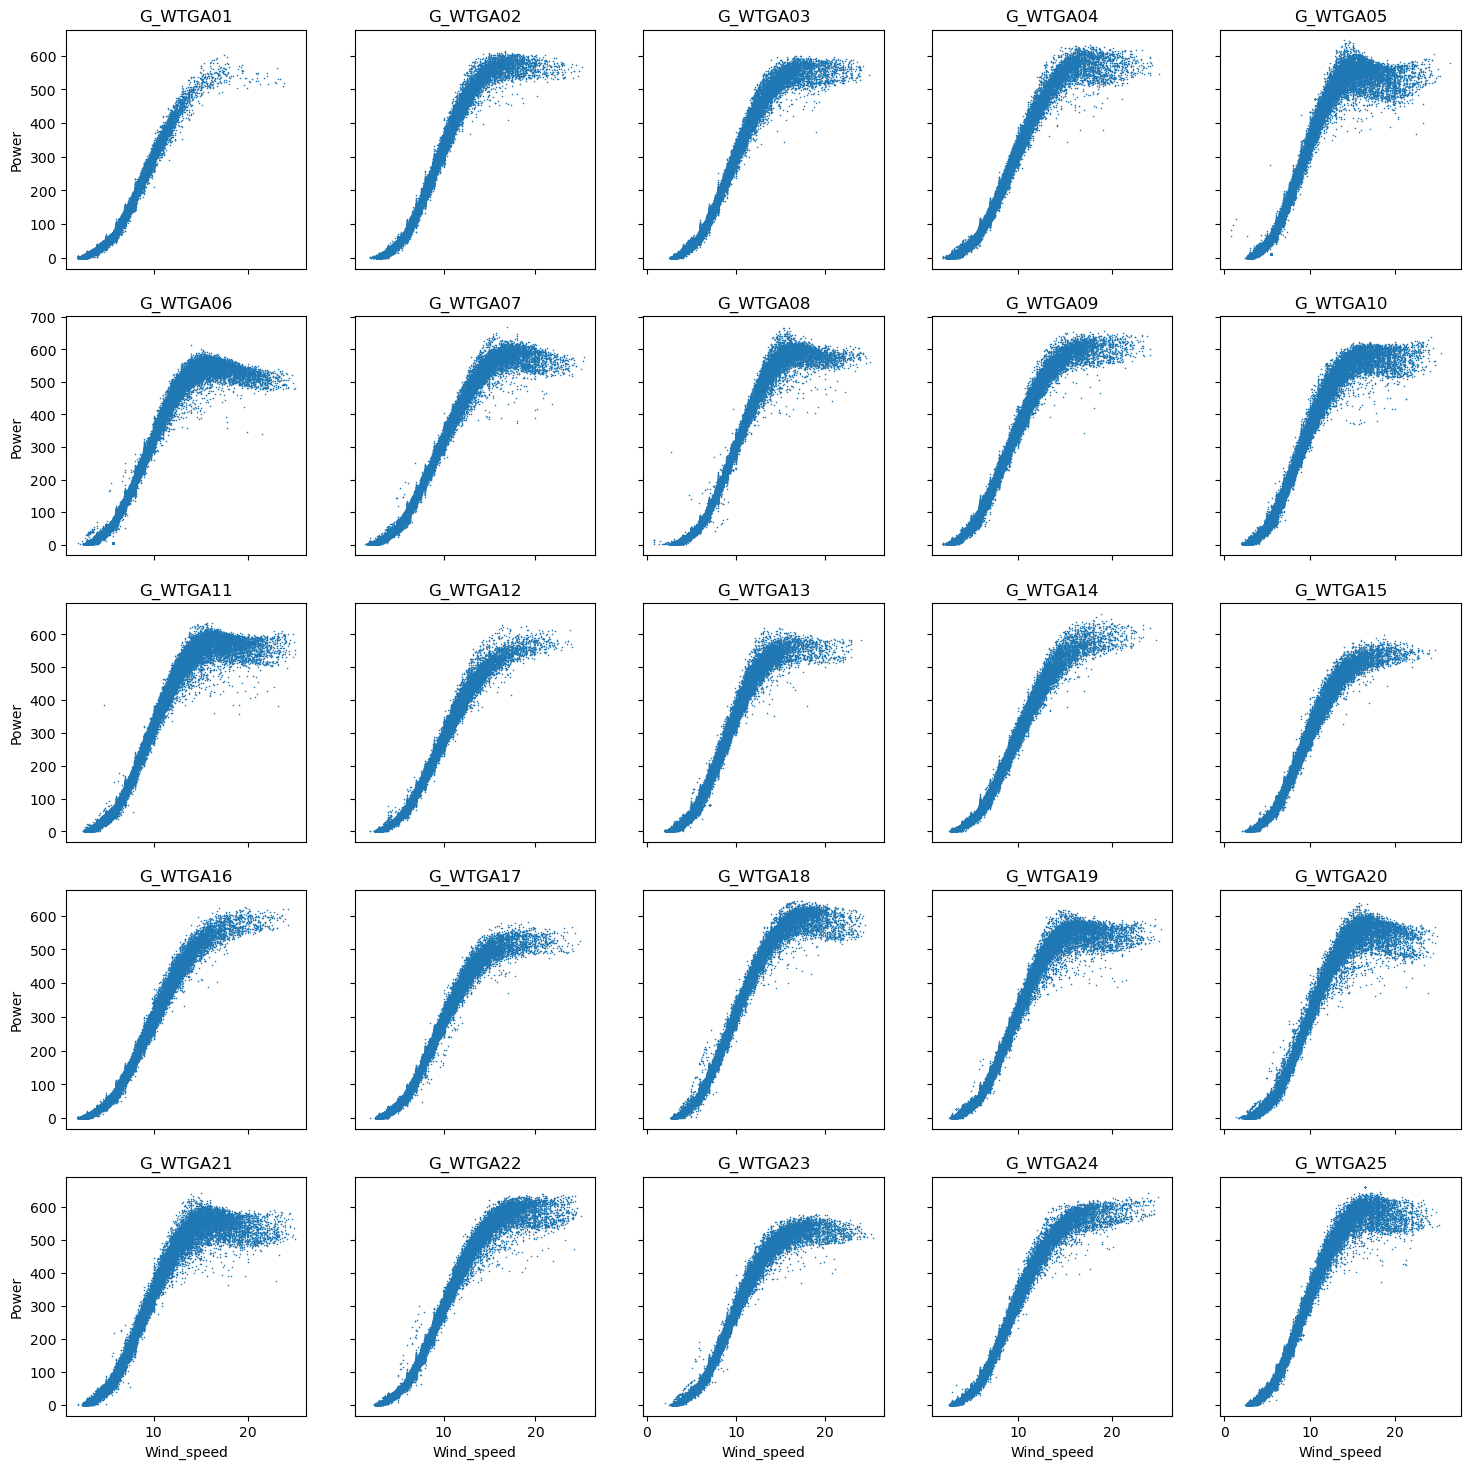

In [44]:
# Plot power curve for each turbine
func.plot_powercurve(df=data_clean, order=instanceID_01, figsize=(18,18))

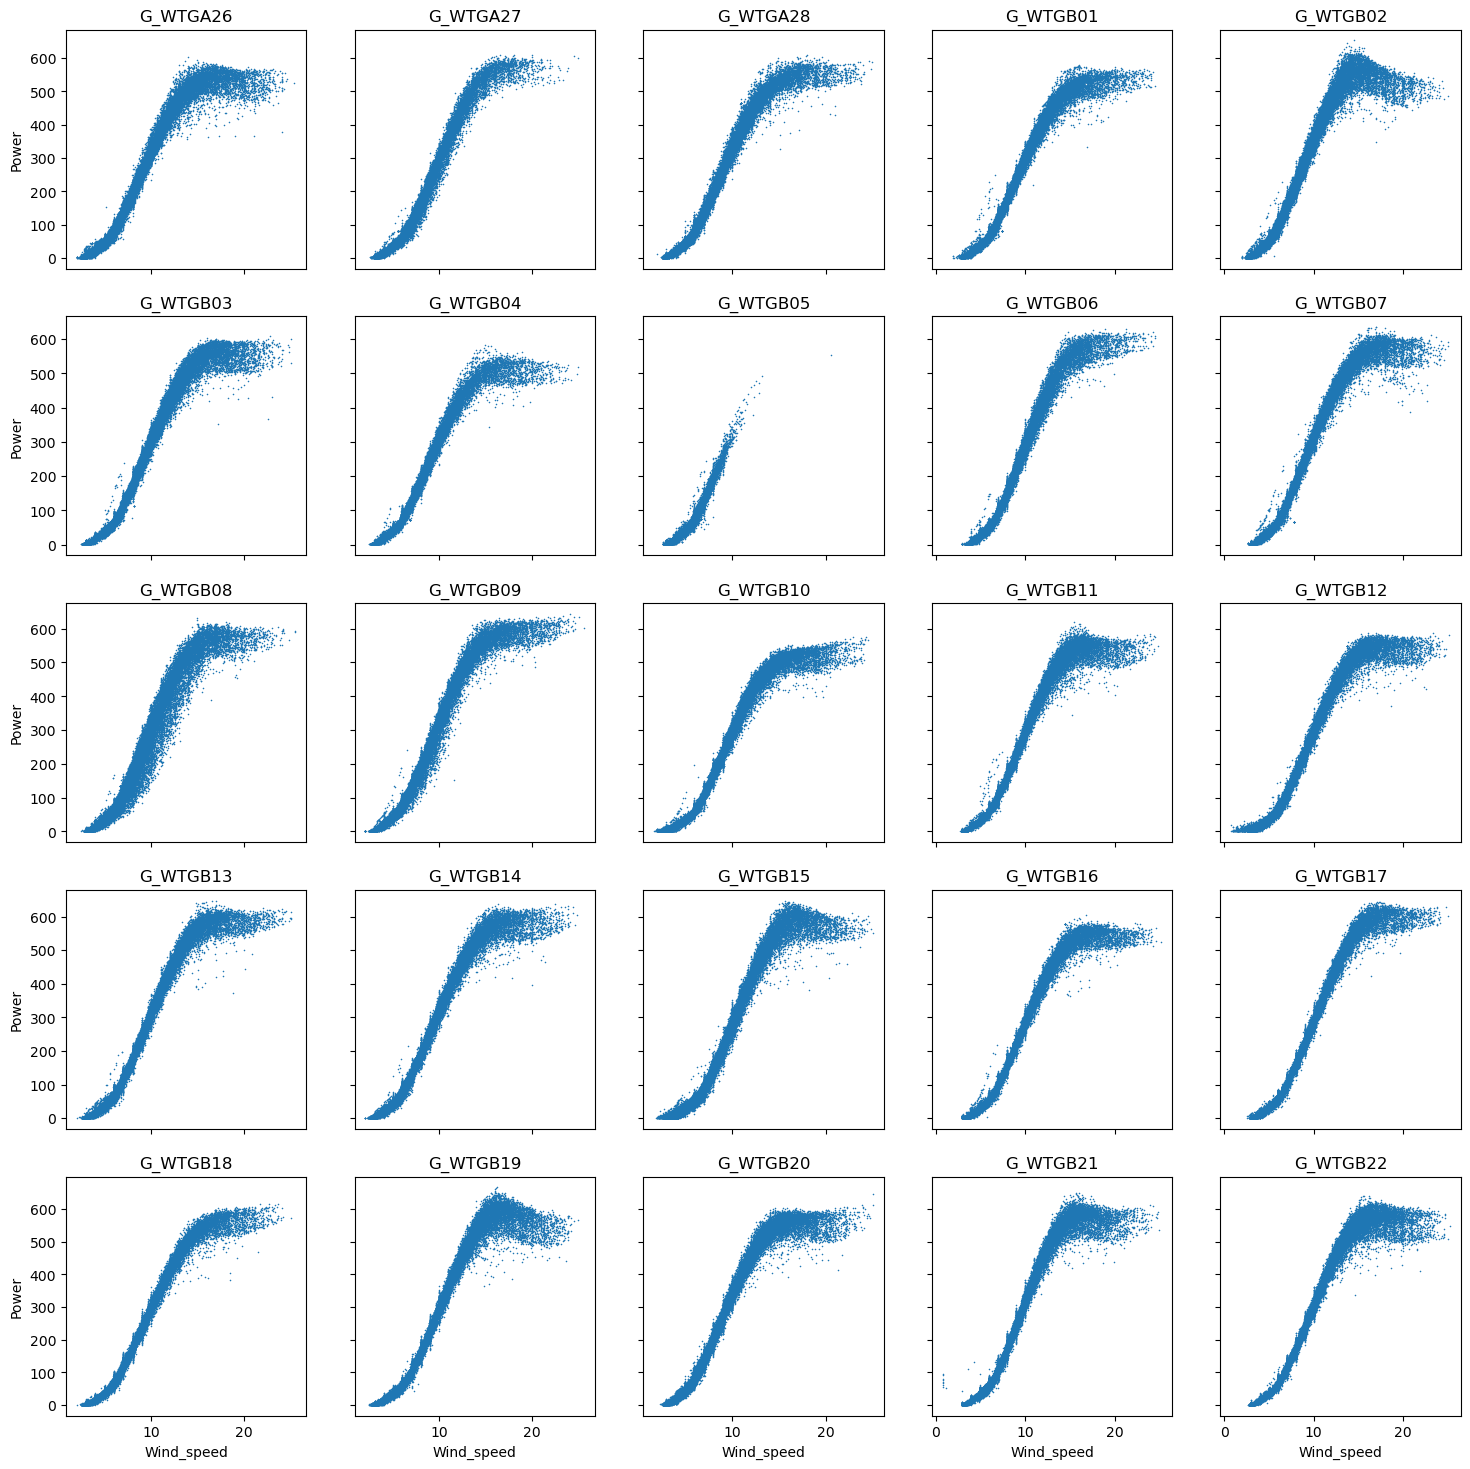

In [45]:
# Plot power curve for each turbine
func.plot_powercurve(df=data_clean, order=instanceID_02, figsize=(18,18))

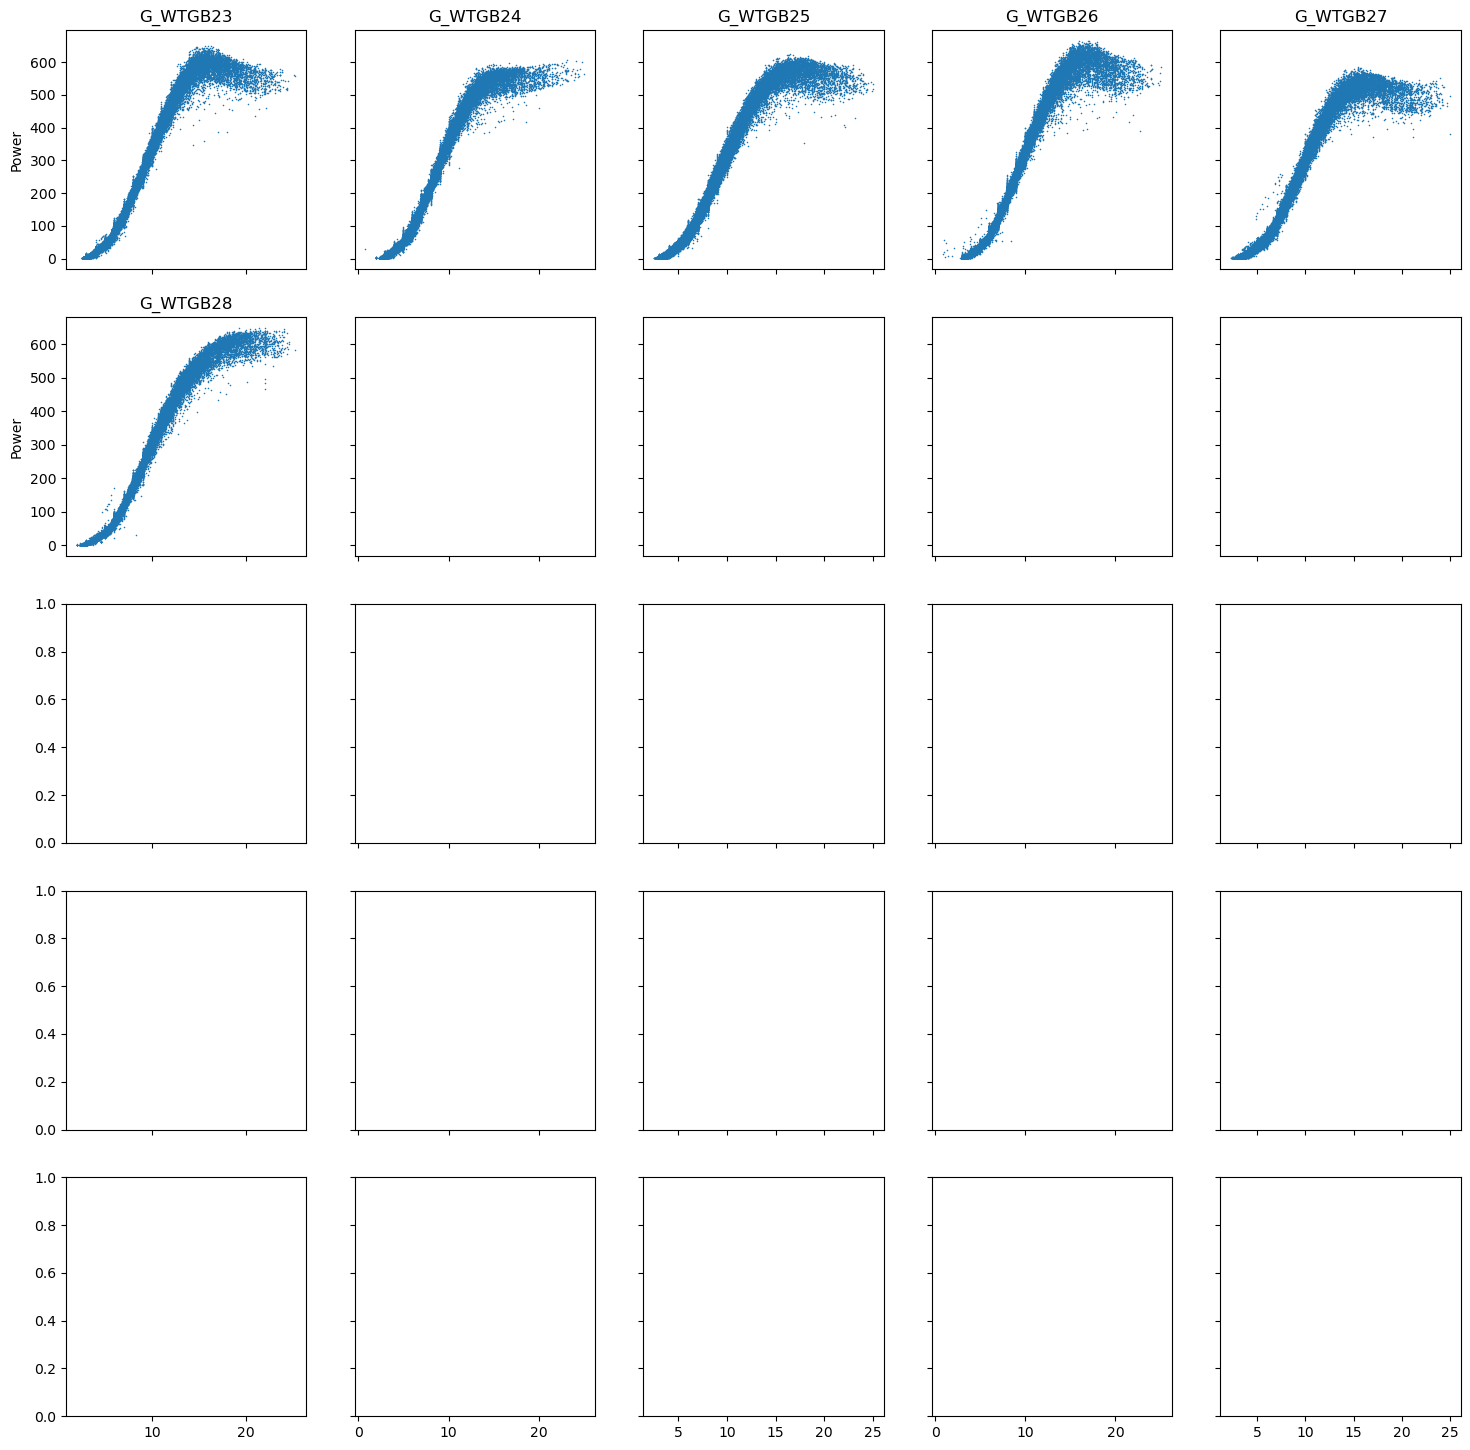

In [46]:
# Plot power curve for each turbine
func.plot_powercurve(df=data_clean, order=instanceID_03, figsize=(18,18))

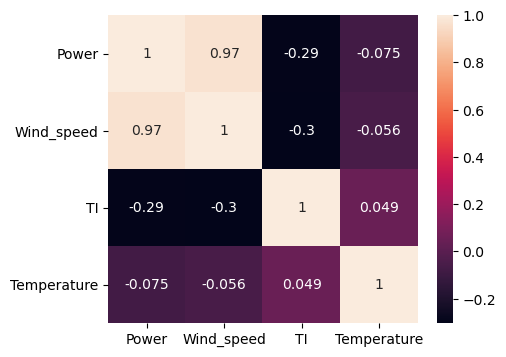

In [47]:
# Plot correlation between variables
plt.figure(figsize = (5,4))
sns.heatmap(data_clean[var].corr(), annot=True)
plt.show()

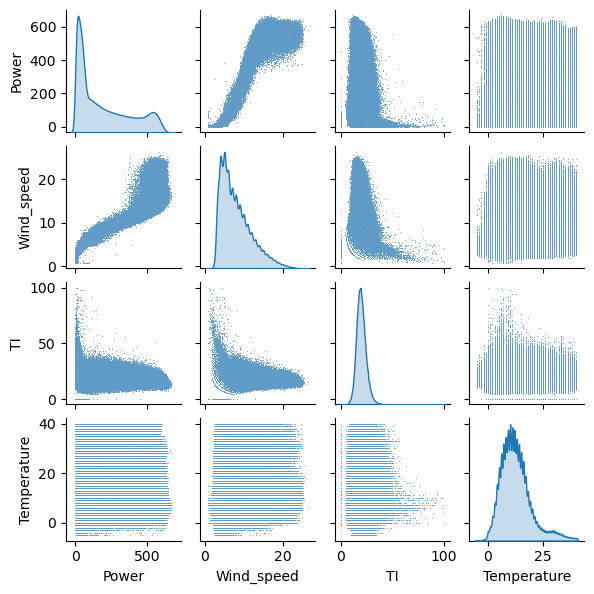

In [48]:
# Make pairplot of the variables
sns.pairplot(data_clean, vars = var, diag_kind = 'kde', plot_kws={'s' : 0.5}, height = 1.5)
plt.show()

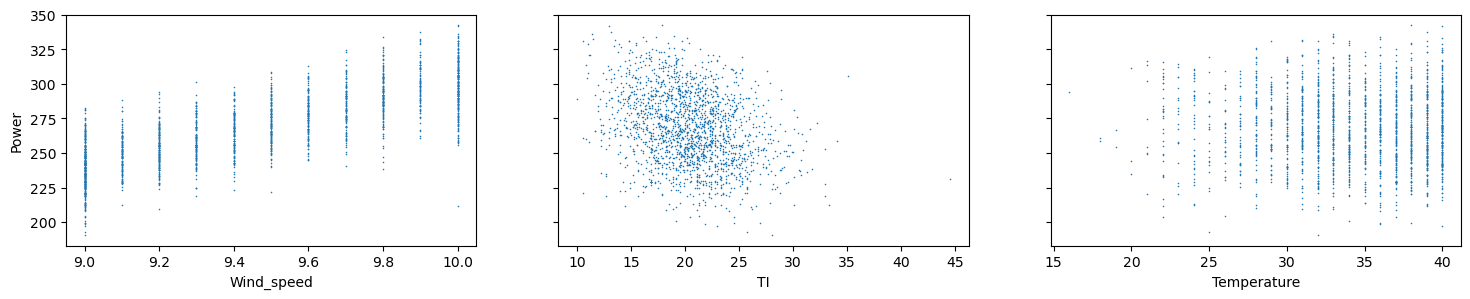

In [50]:
x_var = ["Wind_speed", "TI", "Temperature"]
func.plot_vars(df=data_clean, turbine_name= site + "_WTGA01", ws_range=(9,10), x_var = x_var, figsize=(18,3))

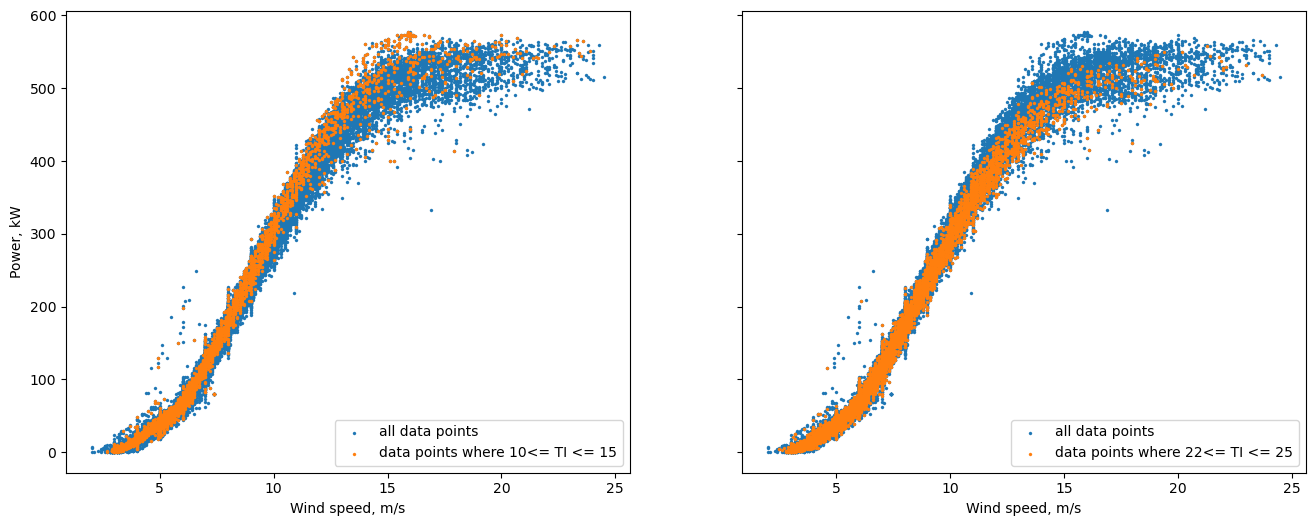

In [55]:
func.plot_TIeffect(df=data_clean, turbine_name= site + "_WTGB01", ws_range1 = (10,15), ws_range2 = (22,25), figsize=(16,6))

### Split data

In [56]:
# define training size and thus number of samples per turbine
train_size = 10000

In [57]:
# sample the data. select equal number of training samples from each turbine. 
data_train = data_clean.groupby('instanceID', group_keys=False).apply(lambda x: x.sample(train_size, 
                                                                                 random_state = 22))

In [58]:
data_train

,ts,Month,Day,Hour,instanceID,Wind_speed,Wind_speed_sd,TI,Temperature,Power
1772568,2020-08-07 19:30:00,8,7,19,G_WTGA01,3.7,1.00,27.027027,31.0,22.500000
1832544,2020-08-15 06:00:00,8,15,6,G_WTGA01,4.4,0.77,17.499999,27.0,38.400002
955304,2020-04-28 11:10:00,4,28,11,G_WTGA01,6.6,1.14,17.272727,34.0,102.199997
1359512,2020-06-17 14:10:00,6,17,14,G_WTGA01,3.0,0.95,31.666666,29.0,9.300000
1718752,2020-08-01 03:20:00,8,1,3,G_WTGA01,4.4,1.22,27.727273,27.0,32.099998
...,...,...,...,...,...,...,...,...,...,...
1503823,2020-07-05 11:30:00,7,5,11,G_WTGB28,16.6,2.68,16.144578,17.0,589.000000
387743,2020-02-18 01:50:00,2,18,1,G_WTGB28,18.0,2.30,12.777778,8.0,606.000000
1610559,2020-07-18 17:10:00,7,18,17,G_WTGB28,7.0,0.77,11.000000,19.0,131.600006
517495,2020-03-05 04:00:00,3,5,4,G_WTGB28,5.4,1.38,25.555555,3.0,48.599998


### Export data

In [59]:
data_clean.to_csv("C://Users//User//Desktop//Wind-turbine-performance-modelling//Data_clean//" + site + "_data_clean.csv")

In [60]:
data_train.to_csv("C://Users//User//Desktop//Wind-turbine-performance-modelling//Data_clean//" + site + "_data_train.csv")